Найкраще значення K: 1


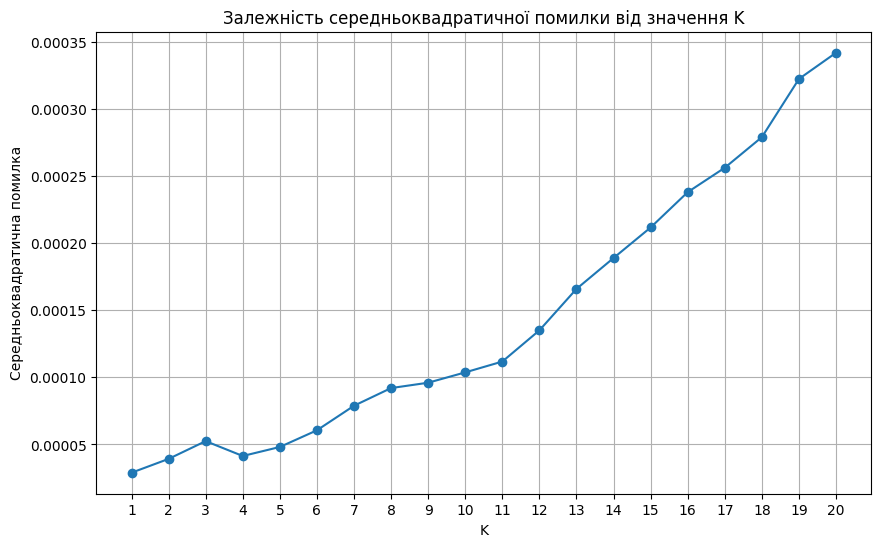

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Згенерувати випадковий набір даних
np.random.seed(0)
X = np.random.rand(1000, 1) * 10  # 1000 значень в діапазоні від 0 до 10
y = np.sin(X).ravel()  # Генеруємо відповіді, використовуючи синус функції

# Нормалізація значень
X_normalized = (X - X.mean()) / X.std()

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Навчання KNN-регресора з різними значеннями K
mse_values = []
k_values = range(1, 21)  # Різні значення K від 1 до 20
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Вибір найкращого значення K
best_k = k_values[np.argmin(mse_values)]
print("Найкраще значення K:", best_k)

# Візуалізація отриманих рішень
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('Залежність середньоквадратичної помилки від значення K')
plt.xlabel('K')
plt.ylabel('Середньоквадратична помилка')
plt.xticks(k_values)
plt.grid(True)
plt.show()